In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df_heart = pd.read_csv("heart.csv")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [52]:
df_heart['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [4]:
df_heart.shape

(1025, 14)

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

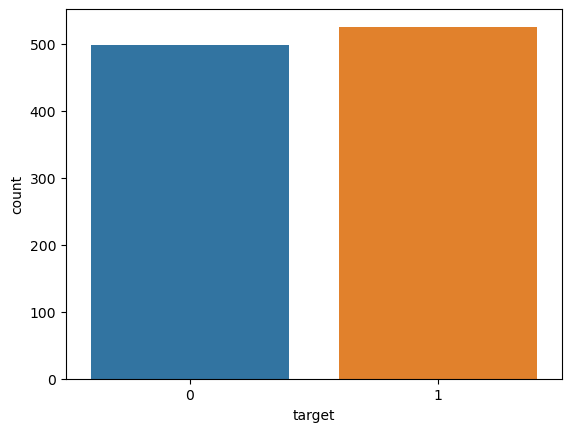

In [8]:
#checking output is balanced or not because of equal importance to both outputs
sns.countplot(x='target',data=df_heart)

In [9]:
#splitting data
X_heart = df_heart.drop(['target'],axis='columns',inplace=False)
y_heart = df_heart['target']
X_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [10]:
#feature selection
from sklearn.feature_selection import SelectKBest
feature = SelectKBest(k=13)
f = feature.fit(X_heart,y_heart)
f.scores_

array([ 56.78513485,  86.6897071 , 238.55845714,  20.08735284,
        10.32615227,   1.73635185,  18.838205  , 222.79953804,
       242.88388949, 243.45077988, 138.67939282, 174.87707812,
       131.80299644])

In [11]:
f_scores = pd.DataFrame(f.scores_,columns=['scores'])
f_scores['features'] = X_heart.columns
i1 = f_scores.nlargest(columns=['scores'],n=13)
i1

,scores,features
9,243.450780,oldpeak
8,242.883889,exang
2,238.558457,cp
7,222.799538,thalach
11,174.877078,ca
10,138.679393,slope
12,131.802996,thal
1,86.689707,sex
0,56.785135,age
3,20.087353,trestbps


In [12]:
from sklearn.ensemble import ExtraTreesClassifier
method = ExtraTreesClassifier()
f2 = method.fit(X_heart,y_heart)
f2.feature_importances_

array([0.06649258, 0.05822123, 0.13219878, 0.05747742, 0.06451085,
       0.01948077, 0.03685263, 0.08025794, 0.10285501, 0.09000115,
       0.06517331, 0.12930223, 0.09717609])

In [13]:
f2_scores = pd.DataFrame(f2.feature_importances_,columns=['scores'])
f2_scores['features'] = X_heart.columns
i2 = f2_scores.nlargest(n=14,columns=['scores'])
i2

,scores,features
2,0.132199,cp
11,0.129302,ca
8,0.102855,exang
12,0.097176,thal
9,0.090001,oldpeak
7,0.080258,thalach
0,0.066493,age
10,0.065173,slope
4,0.064511,chol
1,0.058221,sex


<AxesSubplot:xlabel='scores', ylabel='features'>

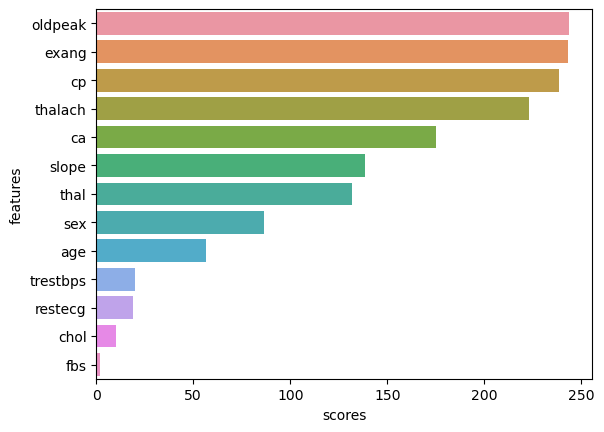

In [14]:
sns.barplot(x=i1['scores'],y=i1['features'])

<AxesSubplot:xlabel='scores', ylabel='features'>

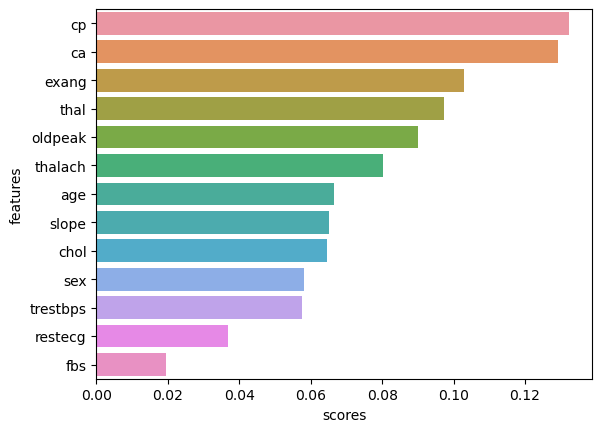

In [15]:
sns.barplot(x=i2['scores'],y=i2['features'])

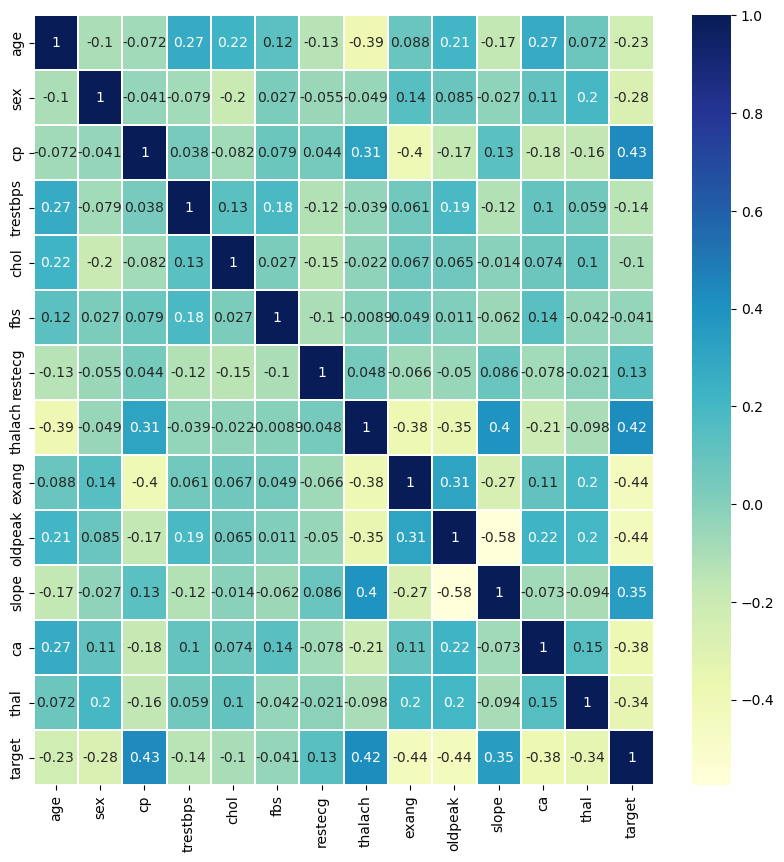

In [16]:
corr_mat = df_heart.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,cbar=True,annot=True,linewidths=.25, cmap='YlGnBu')
plt.show()

In [17]:
X_heart = X_heart.drop(['fbs'], axis='columns', inplace=False)
X_heart

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,1,168,0,1.0,2,2,3
1,53,1,0,140,203,0,155,1,3.1,0,0,3
2,70,1,0,145,174,1,125,1,2.6,0,0,3
3,61,1,0,148,203,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,159,0,0.0,2,0,2


In [18]:
#splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=0)
X_train.shape , X_test.shape

((820, 12), (205, 12))

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train , X_test

(array([[-1.40503359,  0.64895597,  1.97748631, ...,  0.97028605,
          1.17427458, -0.5144228 ],
        [ 1.26270023, -1.5409366 ,  1.01170979, ..., -0.6668221 ,
          0.21616   , -0.5144228 ],
        [-0.18232226,  0.64895597,  1.01170979, ...,  0.97028605,
          2.13238916, -0.5144228 ],
        ...,
        [ 1.15154465,  0.64895597,  1.97748631, ..., -0.6668221 ,
          0.21616   , -0.5144228 ],
        [ 1.3738558 ,  0.64895597, -0.91984324, ..., -0.6668221 ,
         -0.74195458, -0.5144228 ],
        [ 0.59576677,  0.64895597,  1.01170979, ..., -0.6668221 ,
         -0.74195458, -0.5144228 ]]),
 array([[-1.18272244,  0.64895597,  1.01170979, ...,  0.97028605,
         -0.74195458, -0.5144228 ],
        [ 0.37345562, -1.5409366 ,  0.04593327, ...,  0.97028605,
          1.17427458, -0.5144228 ],
        [ 0.9292335 ,  0.64895597, -0.91984324, ...,  0.97028605,
          1.17427458,  1.10177143],
        ...,
        [-1.29387801, -1.5409366 ,  1.01170979, ..., -

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=0)

In [21]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier

In [22]:
models = {
    'logistic_reg' : {
        'model' : LogisticRegression(),
        'params': {
            'C' : [1,3,5,10],
            'solver' : ['lbfgs','liblinear'],
            'random_state' : [0]
        }   
    },
    
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ["gini", "entropy"],
            'splitter' : ["best", "random"],
            'random_state': [0]
        }
    },
    
    'KNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            "n_neighbors" : [5,10,15],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p' : [1,2]
        }
    },
    
#     'naive_bayes' : {
#         'model' : GaussianNB(),
#         'params' : {
            
#         }
#     },
    
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [100,150,200],
            'criterion' : ["gini", "entropy", 'log_loss'],
            'max_depth' : [1,5,10,15],
            'random_state' : [0]
        }
    },
    
    'SVM' : {
        'model' : SVC(),
        'params' : {
            'C' : [1,3,5,10],
            'kernel' : ['rbf', 'sigmoid'],
            'random_state' : [0]
        }
    },
    
    'Adaboost' : {
        'model' : AdaBoostClassifier(),
        'params' : {
            'n_estimators' : [50,100,150,200],
            'learning_rate' : [0.1,0.5,1.0,1.5],
            "random_state" : [0]
        }
    },
    
    'Gradientboost' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'learning_rate' : [0.1,0.5,1.0,1.5],
            'n_estimators' : [50,100,150,200],
            'criterion' : ['friedman_mse', 'squared_error', 'mse'],
            'max_depth' : [1,5,10,15],
            'random_state' : [0]
        }
    },
    
    'xgboost' : {
        'model' : xgb.XGBClassifier(eval_metric='logloss',use_label_encoder=False),
        'params' : {
            'n_estimators' : [50,100,150,200],
            'max_depth' : [1,5,10,15],
            'learning_rate' : [0.1,0.3,0.5,1.0],
#             'booster' : ['gbtree','gblinear','dart'],
            'gamma' : [0,1,2],
            'base_score' : [0.5,1.0,1.5],
            'random_state' : [0]
        }
    },
    
    'bagging' : {
        'model' : BaggingClassifier(base_estimator=random_forest_model),
        'params' : {
            'n_estimators' : [10,50,100]
        }
    }
    
    
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
scores = []
for model,model_params in models.items():
    gscv = GridSearchCV(model_params['model'], model_params['params'], cv=5, return_train_score=False)
    gscv.fit(X_train,y_train)
    scores.append({
        'model' : model,
        'parameters' : gscv.best_params_,
        'scores' : gscv.best_score_
    })
scores

[{'model': 'logistic_reg',
  'parameters': {'C': 1, 'random_state': 0, 'solver': 'lbfgs'},
  'scores': 0.8487804878048781},
 {'model': 'decision_tree',
  'parameters': {'criterion': 'entropy',
   'random_state': 0,
   'splitter': 'best'},
  'scores': 0.9841463414634146},
 {'model': 'KNN',
  'parameters': {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1},
  'scores': 0.8548780487804878},
 {'model': 'random_forest',
  'parameters': {'criterion': 'gini',
   'max_depth': 15,
   'n_estimators': 150,
   'random_state': 0},
  'scores': 0.9878048780487806},
 {'model': 'SVM',
  'parameters': {'C': 10, 'kernel': 'rbf', 'random_state': 0},
  'scores': 0.9731707317073172},
 {'model': 'Adaboost',
  'parameters': {'learning_rate': 1.5, 'n_estimators': 200, 'random_state': 0},
  'scores': 0.9719512195121951},
 {'model': 'Gradientboost',
  'parameters': {'criterion': 'friedman_mse',
   'learning_rate': 1.0,
   'max_depth': 5,
   'n_estimators': 50,
   'random_state': 0},
  'scores': 0.9890243902439024},

In [25]:
#selecting best model with best parameters
df_scores = pd.DataFrame(data=scores, columns=['model','parameters','scores'])
df_scores

,model,parameters,scores
0,logistic_reg,"{'C': 1, 'random_state': 0, 'solver': 'lbfgs'}",0.848780
1,decision_tree,"{'criterion': 'entropy', 'random_state': 0, 's...",0.984146
2,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}",0.854878
3,random_forest,"{'criterion': 'gini', 'max_depth': 15, 'n_esti...",0.987805
4,SVM,"{'C': 10, 'kernel': 'rbf', 'random_state': 0}",0.973171
5,Adaboost,"{'learning_rate': 1.5, 'n_estimators': 200, 'r...",0.971951
6,Gradientboost,"{'criterion': 'friedman_mse', 'learning_rate':...",0.989024
7,xgboost,"{'base_score': 0.5, 'gamma': 0, 'learning_rate...",0.987805
8,bagging,{'n_estimators': 50},0.984146


In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

clf_model = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0,max_depth=5,n_estimators=50,random_state=0)
clf_score = cross_val_score(clf_model, X_train, y_train, cv=5)
np.mean(clf_score)

0.9890243902439024

In [27]:
#building model
clf = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0,max_depth=5,n_estimators=50,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [28]:
#test data accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
acc

0.9804878048780488

In [29]:
#train data accuracy
clf.score(X_train,y_train)

1.0

In [31]:
# y_train_pred = clf.predict(X_train)
# accuracy_score(y_train,y_train_pred)

In [33]:
X_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [35]:
data = [52,1,0,125,212,1,168,0,1.0,2,2,3]
arr_ip = np.array([data])
df = pd.DataFrame(data=arr_ip, columns=X_heart.columns)
df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1.0,0.0,125.0,212.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0


In [38]:
op = clf.predict(df)
if op == 1:
    print("The person is having heart disease")
else:
    print("The person is does not have heart disease")

The person is does not have heart disease


In [39]:
import pickle

In [40]:
with open("heart_disease.pkl", 'wb') as f:
    pickle.dump(clf,f)

In [43]:
with open("heart_disease.pkl", 'rb') as f:
    model = pickle.load(f)

In [44]:
model.predict(df)

array([0], dtype=int64)